### Ćwiczenie 11
Wykrywanie krawędzi obiektów i poprawa ostrości.

1. Użyj filtra z maską Sobela do wykrywania krawędzi poziomych, pionowych i ukośnych.
2. Zaobserwuj działanie Laplasjanu do wyostrzania szczegółów.
3. Zbadaj działanie filtrów typu „unsharp masking” i „high boost”.

In [14]:
import matplotlib.pyplot as plt
import cv2  
import numpy as np
from skimage.filters import sobel,laplace,unsharp_mask,gaussian

In [15]:
# Załadowanie pliku .tiff
img_a = cv2.imread("src/circuitmask.tif") 
img_b = cv2.imread("src/testpat1.png") 
img_c = cv2.imread("src/blurry-moon.tif") 
img_d = cv2.imread("src/text-dipxe-blurred.tif") 

### Zadanie 1
Użycie maski Sobela w celu wykrycia krawędzi poziomych, pionowych i ukośnych.

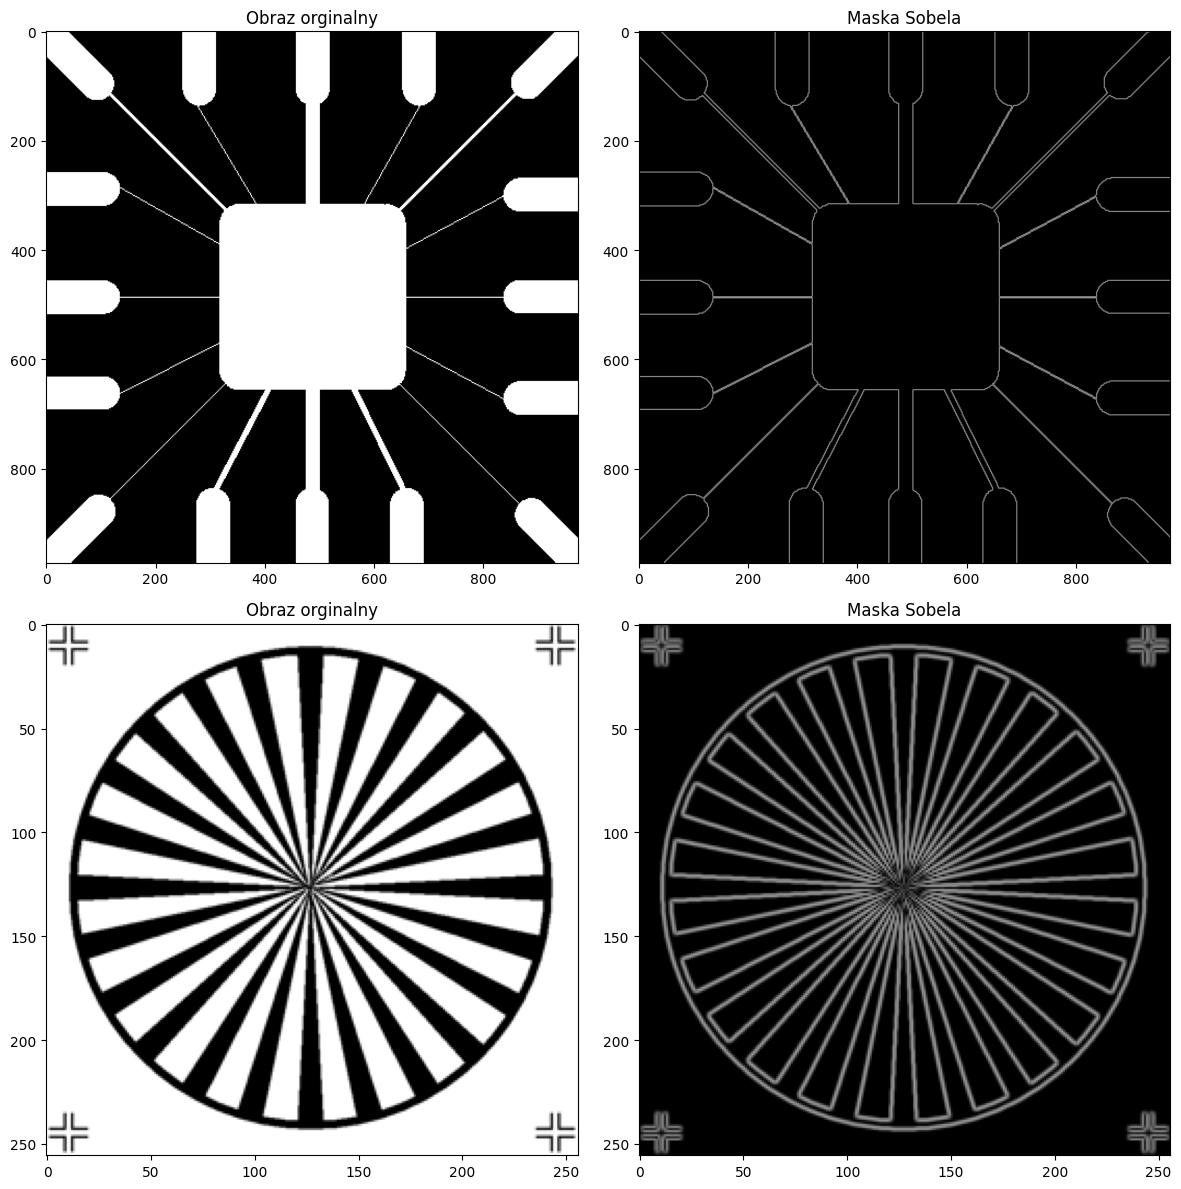

In [16]:
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.imshow(img_a)
plt.title("Obraz orginalny")

plt.subplot(2,2,2)
sob_img_a = sobel(img_a)
plt.imshow(sob_img_a)
plt.title("Maska Sobela")

plt.subplot(2,2,3)
plt.imshow(img_b)
plt.title("Obraz orginalny")

plt.subplot(2,2,4)
sob_img_b = sobel(img_b)
plt.imshow(sob_img_b)
plt.title("Maska Sobela")
plt.tight_layout()
plt.show()

Wykorzystanie maski Sobela pozwala na wyznaczenie zarysów kształtów pozbawiając ich wypełnienia. W ten sposób można uzyskać wyraźne kontury kształtów.

### Zadanie 2
Wykorzystanie Laplasjanu w celu wyostrzenia szczegółów.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.18039215686274515..0.20392156862745087].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..254.99607843137255].


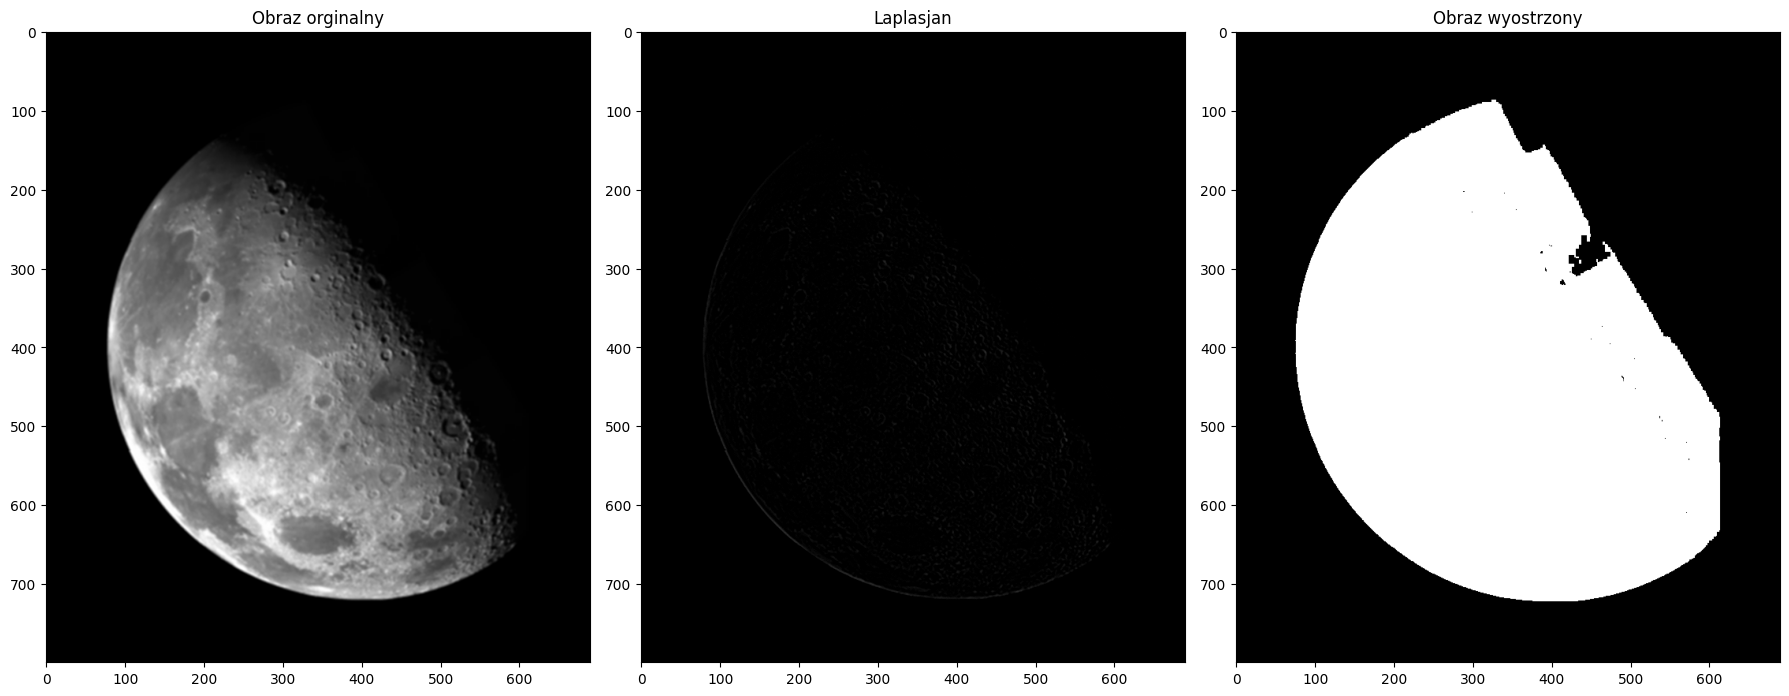

In [17]:
plt.figure(figsize=(18, 10))
plt.subplot(1,3,1)
plt.imshow(img_c)
plt.title("Obraz orginalny")

plt.subplot(1,3,2)
lap_img_c = laplace(img_c)
plt.imshow(lap_img_c)
plt.title("Laplasjan")

plt.subplot(1,3,3)
fin_img_c = img_c - lap_img_c
plt.imshow(fin_img_c)
plt.title("Obraz wyostrzony")

plt.tight_layout()
plt.show()

Wykorzystanie laplasjanu należy wykonać w dwóch krokach:
1. Wyznaczyć Laplasjan, który jest Wykryciem krawędzi na obrazie
2. Odjąć Laplasjan od oryginalnego obrazu

Laplasjan służy głównie do:
 - wykrywania krawędzi,
 - podkreślania szczegółów, 
 - wyostrzania obrazów.

### Zadanie 11
Wykorzystanie filtrów "unsharp masking" oraz "high boost"

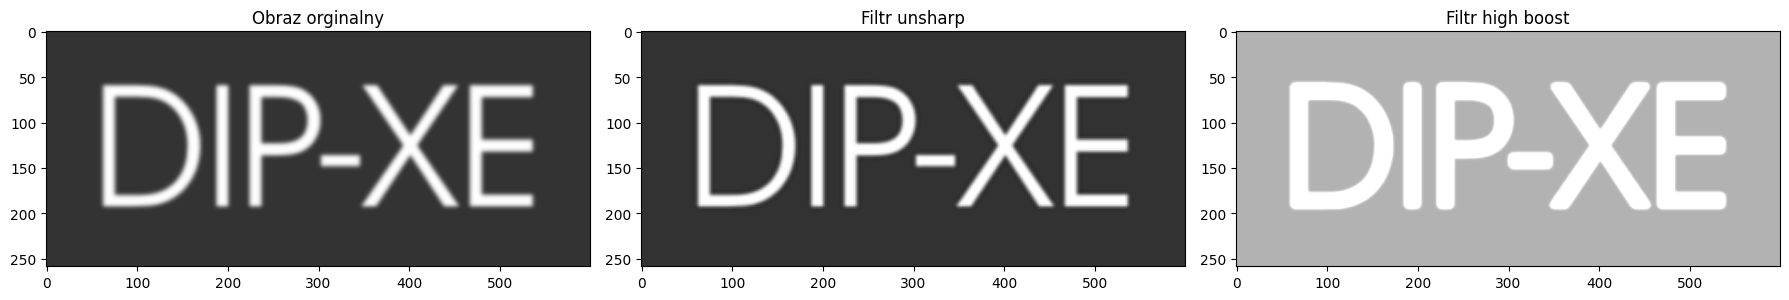

In [18]:
def highBoostFilter(img, k=1.5, sigma=3):
    blur = gaussian(img, sigma=sigma)
    hb = k * img - blur
    hb = np.clip(hb, 0, 255).astype(np.uint8)
    return hb

plt.figure(figsize=(18, 10))
plt.subplot(1,3,1)
plt.imshow(img_d)
plt.title("Obraz orginalny")

plt.subplot(1,3,2)
us_img_d = unsharp_mask(img_d, radius=1.0, amount=3.5)
plt.imshow(us_img_d)
plt.title("Filtr unsharp")

plt.subplot(1,3,3)
hb_img_d = highBoostFilter(img_d, k=3.5, sigma=6) 
plt.imshow(hb_img_d)
plt.title("Filtr high boost")

plt.tight_layout()
plt.show()


W tym eksperymencie porównano efekty działania filtru unsharp mask oraz filtru high-boost na tym samym obrazie.

- Filtr unsharp mask
    - Zastosowano filtr unsharp mask z parametrami radius=1.0 oraz amount=3.5.<br>
Efekt:
Obraz jest silnie wyostrzony – krawędzie i detale są mocno podkreślone, a kontrast lokalny znacznie wzrasta. 
Tak wysoka wartość amount powoduje, że efekt wyostrzenia jest bardzo wyraźny, a drobne szczegóły oraz szumy mogą być również wzmocnione. 
Obraz wydaje się się nienaturalnie ostry, zwłaszcza w miejscach o dużych zmianach jasności.

- Filtr high-boost
    - Zastosowano filtr high-boost z parametrami k=3.5 i sigma=6.<br>
Efekt:
Obraz jest ekstremalnie wyostrzony – efekt jest jeszcze silniejszy niż w przypadku filtru unsharp mask. 
Współczynnik k=3.5 powoduje, że oryginalny obraz jest mocno wzmacniany, a rozmycie z dużym sigma=6 sprawia, że podbijane są również większe struktury. 
Skutkiem tego krawędzie i detale są bardzo mocno zaakcentowane, ale jednocześnie mogą pojawić się silne artefakty, a szumy i drobne zakłócenia są znacznie wzmocnione. 
